In [1]:
import lasio
import matplotlib.pyplot as plt
# import sklearn

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use("seaborn-v0_8-paper")

In [3]:
from source.entities import DataPaths
data_paths = DataPaths()

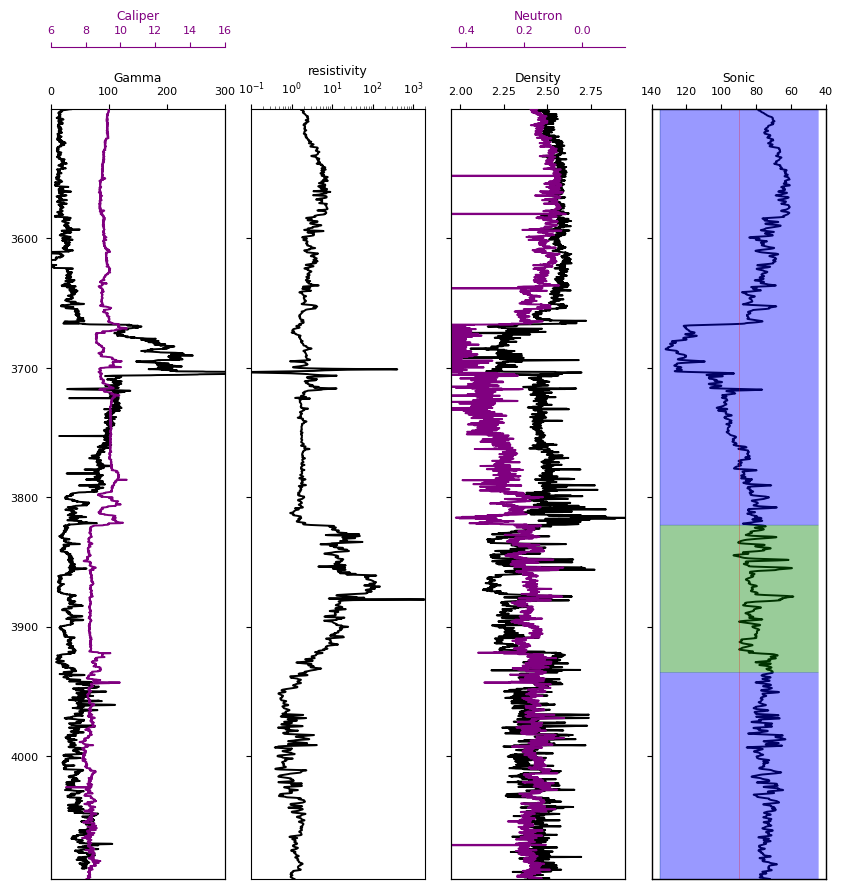

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))

top, bottom = l["DEPTH"].iloc[0], l["DEPTH"].iloc[-1]

ax[0].plot("LFP_GR", "DEPTH", data=l, color='black', label="Gamma")
ax[0].set_xlabel("Gamma")
ax[0].set_xlim(0, 300)

cali = ax[0].twiny()
cali.plot("LFP_CALI", "DEPTH", data=l, color='purple', label="Caliper")
cali.set_xlabel("Caliper", color="purple")
cali.set_xlim(6, 16)
cali.tick_params(axis="x", colors="purple")
cali.spines["top"].set_position(("axes", 1.08))
cali.spines["top"].set_color("purple")

ax[1].plot("LFP_RT", "DEPTH", data=l, color='black', label="medium resistivity")
ax[1].set_xlabel("resistivity")
ax[1].set_xlim(0.1, 2000)
ax[1].semilogx()

ax[2].plot("LFP_RHOB_LOG", "DEPTH", data=l, color='black')
ax[2].set_xlabel("Density")
ax[2].set_xlim(1.95, 2.95)

nue = ax[2].twiny()
nue.plot("LFP_NPHI", "DEPTH", data=l, color='purple', label="neutron")
nue.set_xlabel("Neutron", color="purple")
nue.set_xlim(0.45, -0.15)
nue.tick_params(axis="x", colors="purple")
nue.spines["top"].set_position(("axes", 1.08))
nue.spines["top"].set_color("purple")

ax[3].plot("LFP_DT_LOG", "DEPTH", data=l, color='black')
ax[3].set_xlabel("Sonic")
ax[3].set_xlim(140, 40)

oil = ax[3].twiny()
oil.step(l["LFP_OIL"], l["DEPTH"], where="post", color="none")
oil.fill_betweenx(l["DEPTH"], l["LFP_OIL"], step="post", alpha=0.4, color="green")
oil.set_xticks([])

water = ax[3].twiny()
water.step(l["LFP_WATER"], l["DEPTH"], where="post", color="none")
water.fill_betweenx(l["DEPTH"], l["LFP_WATER"], step="post", alpha=0.4, color="blue")
water.set_xticks([])

gas = ax[3].twiny()
gas.step(l["LFP_GAS"], l["DEPTH"], where="post", color="none")
gas.fill_betweenx(l["DEPTH"], l["LFP_GAS"], step="post", alpha=0.4, color="red")
gas.set_xticks([])

for index, axi in enumerate(ax):
    axi.set_ylim(bottom, top)
    axi.xaxis.set_ticks_position("top")
    axi.xaxis.set_label_position("top")
    if index != 0:
        plt.setp(axi.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace=0.15)

In [4]:
from source.entities import Log

In [5]:
r = Log.from_las(data_paths.las_file_paths[1])

In [11]:
r.dataframe

,DEPTH,LFP_AI,LFP_AI_B,LFP_AI_G,LFP_AI_LOG,LFP_AI_O,LFP_AI_V,LFP_API,LFP_BADDATA,LFP_BVWE,...,LFP_VS_LOG,LFP_VS_O,LFP_VS_V,LFP_VSH,LFP_VSHDN,LFP_VSHDRY,LFP_VSHDRYC,LFP_VSHDRYWC,LFP_VSHGR,LFP_WATER
0,3500.0183,9772.7246,9772.7246,9386.7666,9772.1309,9559.9043,9772.7246,0.899,0.0,0.1122,...,1939.2350,1951.8311,1939.235,0.2519,0.3793,0.2431,0.2431,0.2431,0.2519,1.0
1,3500.1707,9738.0371,9738.0371,9332.1416,9738.1611,9511.0146,9738.0371,0.899,0.0,0.1074,...,1917.5050,1929.3831,1917.505,0.2467,0.4821,0.2382,0.2382,0.2382,0.2467,1.0
2,3500.3230,9682.7344,9682.7344,9184.1543,9682.8135,9395.1484,9682.7344,0.899,0.0,0.1082,...,1907.8120,1919.6980,1907.812,0.1309,0.5391,0.1263,0.1263,0.1263,0.1309,1.0
3,3500.4756,9518.9395,9518.9395,8973.8682,9518.5410,9204.9590,9518.9395,0.899,0.0,0.1254,...,1919.9430,1933.9720,1919.943,0.1112,0.4539,0.1073,0.1073,0.1073,0.1112,1.0
4,3500.6279,9478.5098,9478.5098,8863.2881,9478.4951,9119.5605,9478.5098,0.899,0.0,0.1278,...,1939.7710,1954.2300,1939.771,0.0608,0.3964,0.0587,0.0587,0.0587,0.0608,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,4094.3784,10203.4102,NaN,NaN,10203.9102,NaN,NaN,0.899,0.0,NaN,...,2377.0530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3901,4094.5308,10153.6299,NaN,NaN,10152.9297,NaN,NaN,0.899,0.0,NaN,...,2369.0349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3902,4094.6831,10206.9600,NaN,NaN,10206.6699,NaN,NaN,0.899,0.0,NaN,...,2373.7029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3903,4094.8354,10056.8701,NaN,NaN,10055.8604,NaN,NaN,0.899,0.0,NaN,...,2395.9060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
r.name

'159-19A_LFP'

In [8]:
import dlisio